In [299]:
import numpy as np 
import pandas as pd
import matplotlib 
#%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from matplotlib import pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [296]:
df = pd.read_csv("iris.csv")

In [297]:
df.shape
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [143]:
df["sex"] = df["sex"].astype('category')

In [8]:
number_res = df.select_dtypes(exclude="object").describe()
number_res

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
number_res = df.select_dtypes(include="number").describe()
colnames = number_res.columns
#sns.pairplot(df[colnames])

In [132]:
copy = df[["age","fare","sex"]]
cat_res = copy.select_dtypes(exclude="number").describe()
print(cat_res.columns[0])

sex


In [158]:
copy.loc[:,cat_res.columns[0]] = copy.select_dtypes(exclude="number").dropna()

C:\Users\Williams\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [167]:
copy[cat_res.columns[0]] = copy[cat_res.columns[0]].dropna()

C:\Users\Williams\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
#Build function fot stat descriptive

In [279]:
hue = pd.DataFrame(df[cat_res.columns[0]].dropna())
hue
hue.columns[0]
hue = pd.DataFrame(copy[copy.select_dtypes(exclude="number").columns[0]].dropna())
cat = hue.columns[0]
cat
df.select_dtypes(exclude="number")

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
5,"Anderson, Mr. Harry",male,19952,E12,S,3,"New York, NY"
6,"Andrews, Miss. Kornelia Theodosia",female,13502,D7,S,10,"Hudson, NY"
7,"Andrews, Mr. Thomas Jr",male,112050,A36,S,NaN,"Belfast, NI"
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,11769,C101,S,D,"Bayside, Queens, NY"
9,"Artagaveytia, Mr. Ramon",male,PC 17609,NaN,C,NaN,"Montevideo, Uruguay"


In [292]:
def resum(df):  
#This code help you visualise distribution among continuous variable and one categorial variable
#1.First check your feature types with dataframe.dtypes
#2.If need convert categorial to "category" type
#3.Selcect all the continous variable and one categorial and run your code
#4.You will find inside : distribution of continuous variables
                        #sumarise stat on all variables
                        #box plot within all countinuous and the category features
                        #scatter plot with the category variable as hue
    import pandas as pd
    import numpy as np 
    import seaborn as sns
    import matplotlib as mp
    from matplotlib import pyplot as plt
    from itertools import cycle
    
    number_res = pd.DataFrame(df.select_dtypes(include="number").describe())
    cat_res = pd.DataFrame(df.select_dtypes(exclude="number").describe())
    cat=cat_res.columns[0]
    hue = pd.DataFrame(df[df.select_dtypes(exclude="number").columns[0]].dropna())
    cat = hue.columns[0]
    
    
    print("Continuous feature descritpion")
    
    print(number_res)
    
    
    
    print("Category description")
    
    print(cat_res)
    
    
    corrMatrix = df.select_dtypes(include="number").corr(method='spearman')
    
    print("Correlation between variable : spearman corf")
    print (corrMatrix)
    
    for x in number_res.columns:
        
        ax = sns.distplot(df[x])
        ax.set(ylabel='Proportion')
        ax.set(title =x + " Distribution")
        plt.show()

         
    b=sns.pairplot(df,hue=cat)
    plt.show()
        
    for x in number_res.columns:
        ax = sns.boxplot(df[x], df[cat], data=df)
        ax.set(title =x + " Distribution en fonction de " + cat)
        plt.show()
    
        

In [293]:
df[["age","fare","sex"]].dtypes

age      float64
fare     float64
sex     category
dtype: object

Continuous feature descritpion
               age         fare
count  1046.000000  1308.000000
mean     29.881135    33.295479
std      14.413500    51.758668
min       0.166700     0.000000
25%      21.000000     7.895800
50%      28.000000    14.454200
75%      39.000000    31.275000
max      80.000000   512.329200
Category description
         sex
count   1309
unique     2
top     male
freq     843
Correlation between variable : spearman corf
           age      fare
age   1.000000  0.192676
fare  0.192676  1.000000


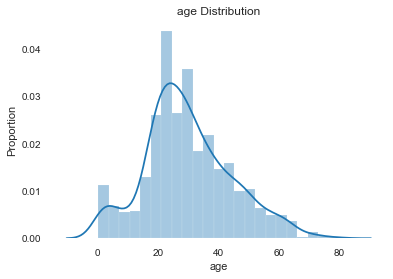

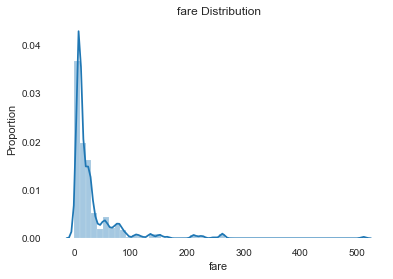

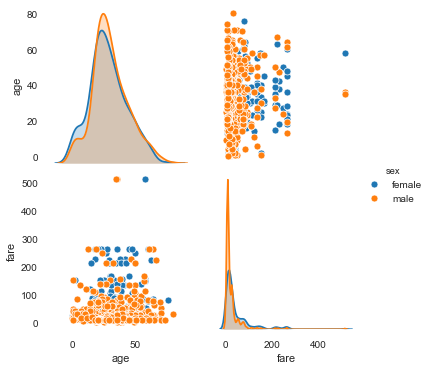

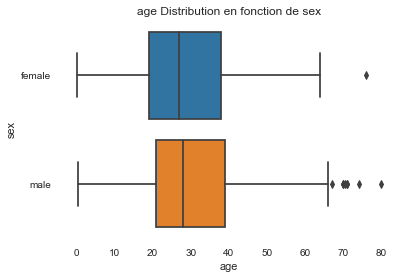

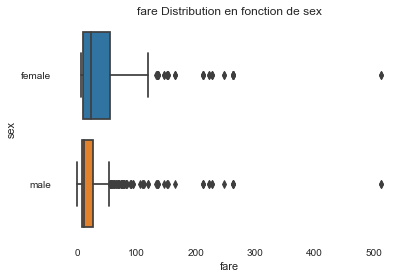

In [294]:
resum(df[["age","fare","sex"]])

Continuous feature descritpion
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
Category description
                Species
count               150
unique                3
top     Iris-versicolor
freq                 50
Correlation between variable : spearman corf
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000     

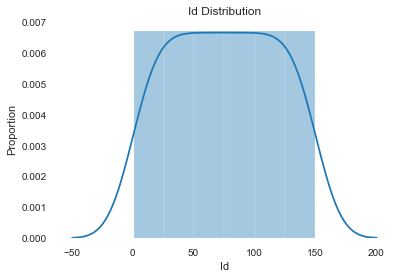

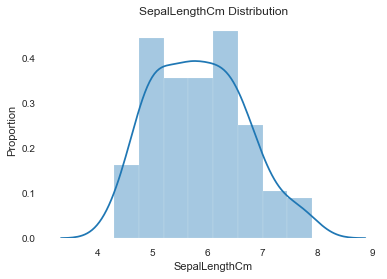

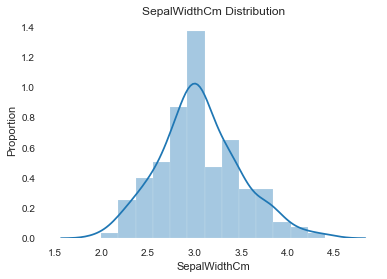

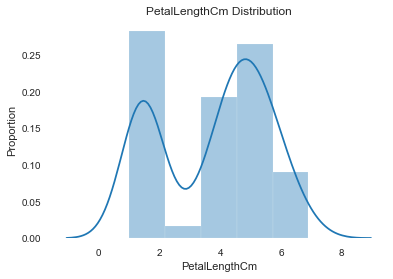

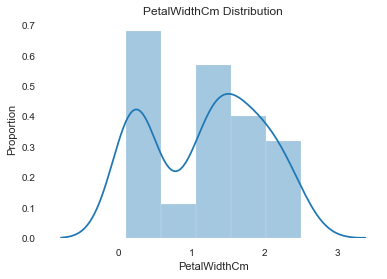

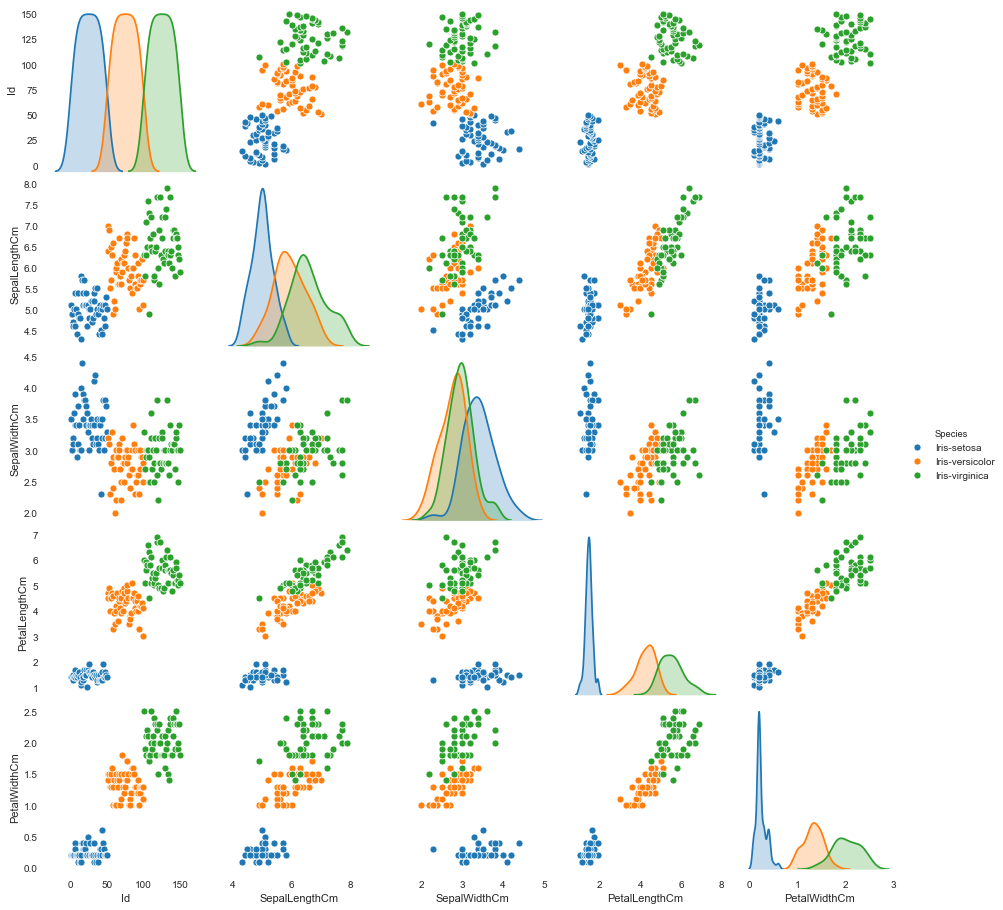

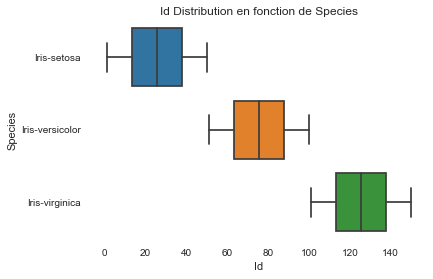

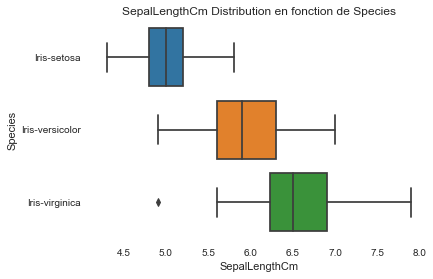

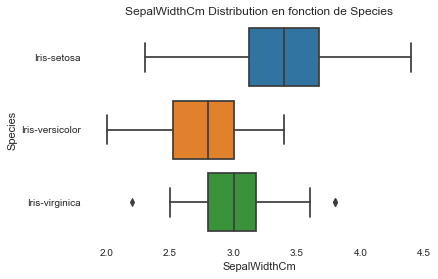

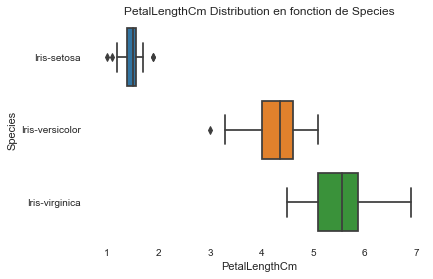

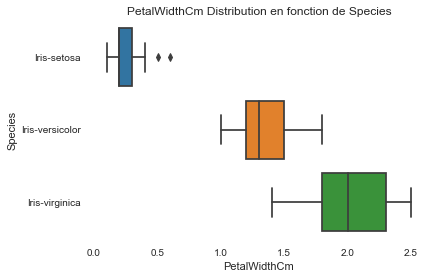

In [300]:
resum(df)

In [12]:
profile.to_file("output.html")